Name: Advik Maniyar <br>
Roll: 42244

In [ ]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [ ]:
df = pd.read_csv('climate_tweets.csv')
df.head()

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...


### Exploratory Data Analysis

In [ ]:
# shape of dataset
print('Shape of dataset = ',df.shape)
# shape of unique elems in dataset
print('Shape of dataset with unique tweets = ',df.tweet.unique().shape)

Shape of dataset =  (6090, 1)
Shape of dataset with unique tweets =  (5541,)


In [ ]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

773

In [ ]:
df.head()

,tweet,is_retweet
0,Global warming report urges governments to act...,False
1,Fighting poverty and global warming in Africa ...,False
2,Carbon offsets: How a Vatican forest failed to...,False
3,Carbon offsets: How a Vatican forest failed to...,False
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False


In [ ]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


/tmp/ipykernel_162581/3052321974.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


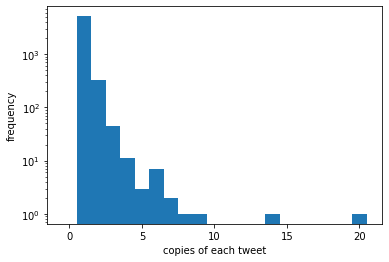

In [ ]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

### Extracting substrings with regex

In [ ]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [ ]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [ ]:
df

,tweet,is_retweet,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[]
...,...,...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]"
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[]
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]"
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[]


### Hashtag Analysis

In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [ ]:
hashtags_list_df

,hashtags
12,"[#Climate, #population]"
16,[#EarthDay]
26,[#ac]
31,[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."
...,...
6076,"[#liberalFascism, #News, #tcot]"
6083,[#climate]
6085,"[#p2, #tcot]"
6087,"[#IPCC, #ocra]"


In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [ ]:
flattened_hashtags_df

,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot
...,...
2062,#IPCC
2063,#ocra
2064,#tcot
2065,#p2


In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

477

In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [ ]:
popular_hashtags

,hashtag,counts
0,#tcot,227
1,#climate,202
2,#p2,112
3,#green,50
4,#climatechange,47
...,...,...
472,#home,1
473,#hoth,1
474,#houston,1
475,#humanrights,1


/tmp/ipykernel_162581/2228165507.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


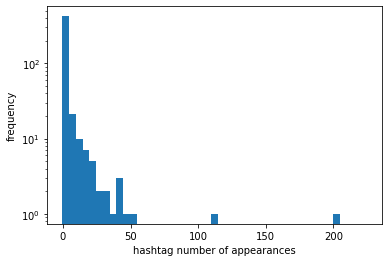

In [ ]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

### Vectorization

In [ ]:
# taking hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [ ]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [ ]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [ ]:
hashtag_vector_df

,popular_hashtags,#globalwarming,#SierraClub,#gop,#fb,#IPCC,#UN,#tlot,#climate,#eco,...,#TCOT,#global,#climategate,#du1,#sgp,#SaveTerra,#green,#tcot,#teaparty,#News
12,[#Climate],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,[#EarthDay],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36,"[#ocra, #sgp, #gop, #tlot, #p2]",0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
39,"[#tcot, #p2]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,"[#News, #tcot]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6083,[#climate],0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6085,"[#p2, #tcot]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6087,"[#IPCC, #ocra]",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

In [ ]:
hashtag_matrix

,#globalwarming,#SierraClub,#gop,#fb,#IPCC,#UN,#tlot,#climate,#eco,#cleantech,...,#TCOT,#global,#climategate,#du1,#sgp,#SaveTerra,#green,#tcot,#teaparty,#News
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
36,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6083,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6087,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


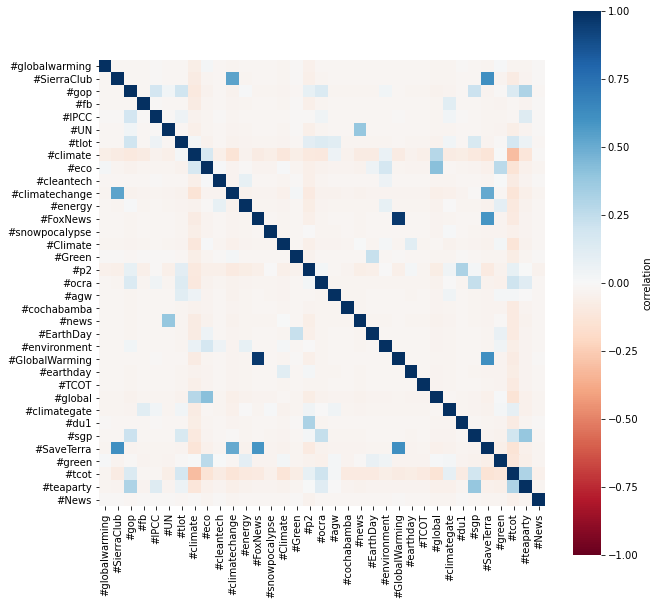

In [ ]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

From the plot above we can see that there are fairly strong correlations between:

\#SaveTerra and #SierraClub

\#GloablWarming and #FoxNews

We can also see a fairly strong negative correlation between:

\#tcot and #climate

### Topic Modelling

#### Cleaning the unstructured text data

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

You should consider upgrading via the '/home/neil/anaconda3/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to /home/neil/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [ ]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)

In [ ]:
df

,tweet,is_retweet,retweeted,mentioned,hashtags,clean_tweet
0,Global warming report urges governments to act...,False,[],[],[],global warm report urg govern act brussel belg...
1,Fighting poverty and global warming in Africa ...,False,[],[],[],fight poverti global warm africa
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[],uruguay tool need vulner climat chang
...,...,...,...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]",phrase global warm abandon favor climat chang...
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[],virginia investig global warm scientist mann
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]",global warm tube parodi enjoy #ipcc #ocra
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[],one eye golfer dare tell global warm twenti fi...


#### Applying Topic Modelling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# chosen arbitrarily
number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
model.fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [ ]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

In [ ]:
topic_df = display_topics(model, tf_feature_names, no_top_words)
topic_df.shape

Thus, 10 topics were identified with 10 words related to each topic.